## Module 4 Final Project: Real-estate Investment

## 1 Introduction

This project is using a dataset from Zillow Research. It contains home prices from 1996 to 2018 in over 14000 zip codes.

The goal is to find out the **top 5 best zip codes** to invest in for a real-estate investment firm.

In this project, the selection criteria will be defined as follows:
* Recent price increase, based on highest rate of return since 2013.
* Low volatility, based on coefficient of variation since 1996.
* Pick from 5 different metro areas for risk diversification.
* Highest percentage increase in estimated price by 2023.


## 2 Import Data

In [1]:
# import libraries and ignore warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


The return on investment is calculated for the last 5 years, starting in 2013. It is the percentage increase in price from 2013 to 2018. It represents places with the highest price uptrend recently.

In [4]:
rise = (df['2018-04']-df['2013-01'])/df['2013-01']
rise.head()

0    0.284557
1    0.562895
2    0.284157
3    0.298817
4    0.075221
dtype: float64

In [5]:
# drop zip codes with null values
df = df.dropna()
df['rise'] = rise
# sort by 5-year return
df = df.sort_values('rise', axis=0, ascending=False)
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,rise
1477,97803,94601,Oakland,CA,San Francisco,Alameda,1478,114600.0,114500.0,114500.0,...,506600,514100,521100,526700,535800,546900,555000,562000,566700,1.925658
1239,97795,94590,Vallejo,CA,Vallejo,Solano,1240,108200.0,107800.0,107500.0,...,339600,343500,346700,351200,357100,362500,366900,371600,376100,1.783864
2627,72619,33460,Lake Worth,FL,Miami-Fort Lauderdale,Palm Beach,2628,59800.0,59900.0,60000.0,...,195500,198400,200400,202600,206000,209600,211600,213300,215600,1.778351
2661,72768,33705,Saint Petersburg,FL,Tampa,Pinellas,2662,54600.0,54800.0,55000.0,...,154700,158900,162500,165300,167100,168200,171100,175100,177300,1.727692
5830,79095,48240,Redford,MI,Detroit,Wayne,5831,67800.0,68200.0,68500.0,...,67100,68100,68700,69700,71000,72300,73500,75300,76800,1.704225
6105,74241,37210,Nashville,TN,Nashville,Davidson,6106,60800.0,61000.0,61200.0,...,204600,207700,211100,214500,217200,219300,221500,224300,226500,1.677305
1758,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,62300.0,62300.0,62300.0,...,244200,247900,251700,255300,258800,261600,264300,268700,272500,1.617675
1273,72601,33435,Boynton Beach,FL,Miami-Fort Lauderdale,Palm Beach,1274,72700.0,72900.0,73000.0,...,198700,201900,204600,206200,207000,207500,209100,212200,214900,1.617540
4298,98433,95824,Sacramento,CA,Sacramento,Sacramento,4299,73800.0,73400.0,73000.0,...,211700,213300,214500,215900,218400,221400,223500,224700,224700,1.615832
2988,72233,32807,Orlando,FL,Orlando,Orange,2989,68300.0,68400.0,68500.0,...,171000,172600,174000,176000,178200,179900,181500,183800,186000,1.612360


On the other hand, the investment should pick places with lower volatility. It lowers the risk when there is a housing price drop. 

The coefficient of variation is used here, it is defined as the standard deviation devided by mean. All 22 years of data is used, null values are skipped. The higher the coefficient, the more volatile the price is historically for that zip code.

In [6]:
df['var'] = df.loc[:,"1996-04":"2018-04"].std(skipna=True,axis=1)/df.loc[:,"1996-04":"2018-04"].mean(skipna=True,axis=1)
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,rise,var
1477,97803,94601,Oakland,CA,San Francisco,Alameda,1478,114600.0,114500.0,114500.0,...,514100,521100,526700,535800,546900,555000,562000,566700,1.925658,0.446431
1239,97795,94590,Vallejo,CA,Vallejo,Solano,1240,108200.0,107800.0,107500.0,...,343500,346700,351200,357100,362500,366900,371600,376100,1.783864,0.447739
2627,72619,33460,Lake Worth,FL,Miami-Fort Lauderdale,Palm Beach,2628,59800.0,59900.0,60000.0,...,198400,200400,202600,206000,209600,211600,213300,215600,1.778351,0.453303
2661,72768,33705,Saint Petersburg,FL,Tampa,Pinellas,2662,54600.0,54800.0,55000.0,...,158900,162500,165300,167100,168200,171100,175100,177300,1.727692,0.373430
5830,79095,48240,Redford,MI,Detroit,Wayne,5831,67800.0,68200.0,68500.0,...,68100,68700,69700,71000,72300,73500,75300,76800,1.704225,0.398630
6105,74241,37210,Nashville,TN,Nashville,Davidson,6106,60800.0,61000.0,61200.0,...,207700,211100,214500,217200,219300,221500,224300,226500,1.677305,0.354914
1758,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,62300.0,62300.0,62300.0,...,247900,251700,255300,258800,261600,264300,268700,272500,1.617675,0.336582
1273,72601,33435,Boynton Beach,FL,Miami-Fort Lauderdale,Palm Beach,1274,72700.0,72900.0,73000.0,...,201900,204600,206200,207000,207500,209100,212200,214900,1.617540,0.417989
4298,98433,95824,Sacramento,CA,Sacramento,Sacramento,4299,73800.0,73400.0,73000.0,...,213300,214500,215900,218400,221400,223500,224700,224700,1.615832,0.462982
2988,72233,32807,Orlando,FL,Orlando,Orange,2989,68300.0,68400.0,68500.0,...,172600,174000,176000,178200,179900,181500,183800,186000,1.612360,0.379100


In [7]:
df['var'].describe()

count    12895.000000
mean         0.229809
std          0.080403
min          0.041275
25%          0.167340
50%          0.225157
75%          0.283216
max          0.697541
Name: var, dtype: float64

The median coefficient of variation is 0.216, while the 75 percentile is 0.276. From the top 100 list above, almost all of them are above 0.3. It makes sense because the higher percentage increase, the higher standard deviation is.

To obtain a balance, a cut-off of 0.35 is introduced. Here is the top 25 zip codes with coefficients of variation <= 0.35.



In [8]:
df[df['var']<=0.35].head(25)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,rise,var
1758,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,62300.0,62300.0,62300.0,...,247900,251700,255300,258800,261600,264300,268700,272500,1.617675,0.336582
2266,70977,30238,Jonesboro,GA,Atlanta,Clayton,2267,85300.0,85300.0,85300.0,...,89900,91300,93300,95400,97200,99100,101100,102900,1.559701,0.312114
1835,74238,37207,Nashville,TN,Nashville,Davidson,1836,63600.0,63600.0,63600.0,...,184200,186700,188000,189500,191400,193900,197600,200800,1.544994,0.295781
1202,70819,30034,Panthersville,GA,Atlanta,Dekalb,1203,86000.0,86400.0,86800.0,...,113200,115200,117100,118900,120900,122900,125200,126800,1.500986,0.262098
2782,79092,48237,Oak Park,MI,Detroit,Oakland,2783,75200.0,75900.0,76600.0,...,120800,122300,123200,123700,124800,126400,128300,129600,1.459203,0.307233
1962,79094,48239,Redford,MI,Detroit,Wayne,1963,80100.0,80700.0,81300.0,...,87300,88200,89500,90800,91900,93600,95900,97600,1.452261,0.345678
2060,95909,89431,Sparks,NV,Reno,Washoe,2061,110500.0,110800.0,111100.0,...,232400,235200,237000,238500,240100,242500,247000,250900,1.419479,0.329099
2470,93200,80010,Aurora,CO,Denver,Arapahoe,2471,70400.0,70800.0,71400.0,...,255700,257700,260600,264000,266500,269500,274100,277600,1.397237,0.318819
6758,87103,66103,Kansas City,KS,Kansas City,Wyandotte,6759,48600.0,48800.0,49000.0,...,101500,104500,106500,108200,110600,111600,111200,111700,1.381663,0.206811
1284,79055,48198,Superior,MI,Ann Arbor,Washtenaw,1285,73800.0,74200.0,74600.0,...,110800,111700,113600,115900,118300,120900,122900,124500,1.371429,0.298100


These are the 25 zip codes to be tested in the model.

## 3 Data Preprocessing

The data is currently stored as wide format, with each month as a column. In order to be used for time series modeling, it has to converted to long format, where each month is a row.

In [9]:
df = df[df['var']<=0.35].head(25)
df = df.drop(['RegionID','City','State','Metro','CountyName','SizeRank','rise','var'],axis=1)

In [10]:
df = df.set_index('RegionName')
df

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionName,,,,,,,,,,,,,,,,,,,,,
30316,62300.0,62300.0,62300.0,62300.0,62300.0,62300.0,62300.0,62300.0,62400.0,62600.0,...,240900,244200,247900,251700,255300,258800,261600,264300,268700,272500
30238,85300.0,85300.0,85300.0,85300.0,85200.0,85200.0,85300.0,85300.0,85300.0,85400.0,...,87200,88700,89900,91300,93300,95400,97200,99100,101100,102900
37207,63600.0,63600.0,63600.0,63700.0,64000.0,64300.0,64800.0,65400.0,66000.0,66700.0,...,177300,180700,184200,186700,188000,189500,191400,193900,197600,200800
30034,86000.0,86400.0,86800.0,87200.0,87700.0,88200.0,88600.0,89000.0,89500.0,90100.0,...,109500,111000,113200,115200,117100,118900,120900,122900,125200,126800
48237,75200.0,75900.0,76600.0,77300.0,78000.0,78800.0,79500.0,80200.0,81100.0,81900.0,...,118500,119600,120800,122300,123200,123700,124800,126400,128300,129600
48239,80100.0,80700.0,81300.0,81900.0,82500.0,83100.0,83600.0,84000.0,84600.0,85100.0,...,83700,85700,87300,88200,89500,90800,91900,93600,95900,97600
89431,110500.0,110800.0,111100.0,111400.0,111600.0,111900.0,112200.0,112500.0,113000.0,113500.0,...,226500,229000,232400,235200,237000,238500,240100,242500,247000,250900
80010,70400.0,70800.0,71400.0,72000.0,72500.0,73200.0,73800.0,74500.0,75300.0,76300.0,...,252200,254000,255700,257700,260600,264000,266500,269500,274100,277600
66103,48600.0,48800.0,49000.0,49300.0,49500.0,49900.0,50200.0,50600.0,51100.0,51600.0,...,95000,97000,101500,104500,106500,108200,110600,111600,111200,111700


In [11]:
# transpose the dataframe, to convert to long format
df = df.T

In [12]:
df['month'] = df.index
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)
df.head()

RegionName,30316,30238,37207,30034,48237,48239,89431,80010,66103,48198,...,89506,33563,49507,32822,89503,33881,89433,28208,30296,89121
month,,,,,,,,,,,,,,,,,,,,,
1996-04-01,62300.0,85300.0,63600.0,86000.0,75200.0,80100.0,110500.0,70400.0,48600.0,73800.0,...,127200.0,55900.0,49700.0,75300.0,124100.0,54300.0,109700.0,59000.0,89200.0,106800.0
1996-05-01,62300.0,85300.0,63600.0,86400.0,75900.0,80700.0,110800.0,70800.0,48800.0,74200.0,...,127400.0,56000.0,51000.0,75400.0,124500.0,54200.0,110100.0,59300.0,89300.0,107000.0
1996-06-01,62300.0,85300.0,63600.0,86800.0,76600.0,81300.0,111100.0,71400.0,49000.0,74600.0,...,127700.0,56100.0,52300.0,75500.0,124800.0,54200.0,110500.0,59500.0,89400.0,107200.0
1996-07-01,62300.0,85300.0,63700.0,87200.0,77300.0,81900.0,111400.0,72000.0,49300.0,74900.0,...,127800.0,56200.0,53500.0,75500.0,125200.0,54100.0,110800.0,59800.0,89500.0,107400.0
1996-08-01,62300.0,85200.0,64000.0,87700.0,78000.0,82500.0,111600.0,72500.0,49500.0,75300.0,...,128000.0,56300.0,54600.0,75600.0,125500.0,54000.0,111200.0,60000.0,89700.0,107600.0


## 4 EDA and Visualization

Here are the maximum price of the 25 zip codes. All of them are below 320000.

It seems that cheaper zip codes have higher percentage growth.

In [13]:
df.max()

RegionName
30316    272500.0
30238    126800.0
37207    200800.0
30034    139200.0
48237    145700.0
48239    136200.0
89431    265000.0
80010    277600.0
66103    111700.0
48198    141200.0
89502    285900.0
80219    315700.0
33830    132100.0
48220    163500.0
32810    206200.0
89506    294100.0
33563    158800.0
49507    111200.0
32822    215600.0
89503    310200.0
33881    147000.0
89433    283600.0
28208    113400.0
30296    139700.0
89121    265500.0
dtype: float64

Here is a plot for 5 of the zip codes coming from different states.

The general trend is going up from 1996 to 2007, and going down until 2012, and then up again.

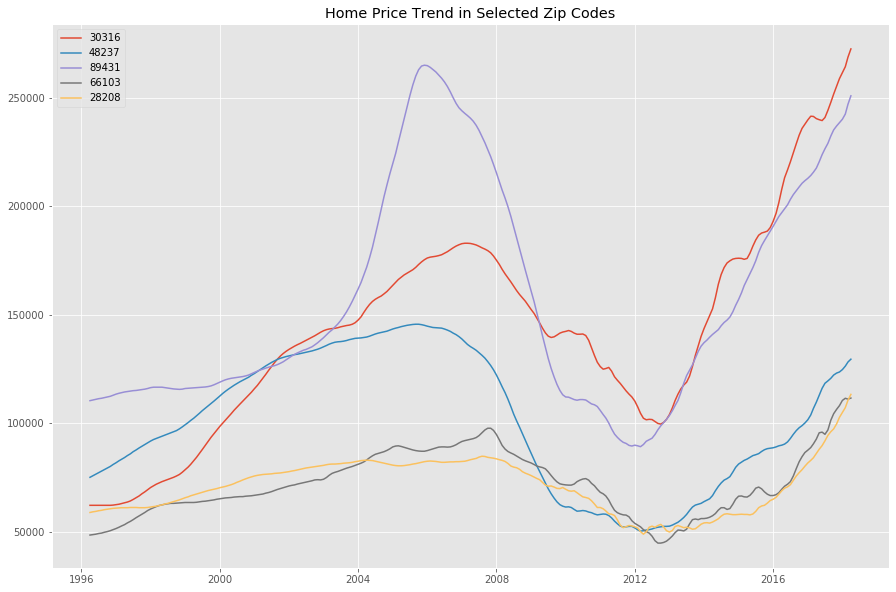

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
zips=[30316,48237,89431,66103,28208]
for z in zips:
    plt.plot(df[z],label=z);
plt.title('Home Price Trend in Selected Zip Codes')
plt.legend();

## 5 ARIMA Modeling

Next step ARIMA model is used to predict future prices of these 25 zip codes.

In [15]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
    
result = []    
    
for c in df.columns:
    print('---------------')
    print('Zip Code', c)
    col = df[c].resample('MS').mean()
    col = col.fillna(col.bfill())
        
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            mod = sm.tsa.statespace.SARIMAX(col, order=comb, seasonal_order=combs, enforce_stationarity=False, enforce_invertibility=False)
            output = mod.fit()
            ans.append([comb, combs, output.aic])
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]
      
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(col,
                                order=ans_df.loc[ans_df['aic'].idxmin()][0],
                                seasonal_order=ans_df.loc[ans_df['aic'].idxmin()][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    output = ARIMA_MODEL.fit()

    prediction = output.get_forecast(steps = 60)
    pred_conf = prediction.conf_int()

    print('Projected Price in April 2023: ',prediction.predicted_mean[59])
    print('Percentage Increase: ',(prediction.predicted_mean[59]-df[col.name]['2018-04-01'])*100/df[col.name]['2018-04-01'])
    result.append((col.name,df[col.name]['2018-04-01'],prediction.predicted_mean[59], (prediction.predicted_mean[59]-df[col.name]['2018-04-01'])*100/df[col.name]['2018-04-01']))

---------------
Zip Code 30316
Projected Price in April 2023:  359312.2534943383
Percentage Increase:  31.85770770434433
---------------
Zip Code 30238
Projected Price in April 2023:  184913.20261473142
Percentage Increase:  79.70184899390809
---------------
Zip Code 37207
Projected Price in April 2023:  346858.74068994593
Percentage Increase:  72.73841667825992
---------------
Zip Code 30034
Projected Price in April 2023:  162382.41725073126
Percentage Increase:  28.061843257674496
---------------
Zip Code 48237
Projected Price in April 2023:  162437.01067651963
Percentage Increase:  25.337199596079955
---------------
Zip Code 48239
Projected Price in April 2023:  139618.73724609314
Percentage Increase:  43.05198488329215
---------------
Zip Code 89431
Projected Price in April 2023:  404620.42961485
Percentage Increase:  61.26760845550021
---------------
Zip Code 80010
Projected Price in April 2023:  433940.3478964325
Percentage Increase:  56.31856912695695
---------------
Zip Code 66

In [16]:
# Sort by percentage increase
result.sort(key=lambda x:x[3],reverse=True)
result = pd.DataFrame(result, columns=['Zip Code','Price in April 2018','Projected Price in April 2023','Percentage Increase'])[0:10]
result

,Zip Code,Price in April 2018,Projected Price in April 2023,Percentage Increase
0,30238,102900.0,184913.202615,79.701849
1,28208,113400.0,201593.664970,77.772191
2,37207,200800.0,346858.740690,72.738417
3,89433,272600.0,452048.357727,65.828451
4,89431,250900.0,404620.429615,61.267608
5,80010,277600.0,433940.347896,56.318569
6,89502,281200.0,430488.320618,53.089730
7,89506,279400.0,426310.343296,52.580653
8,89503,310200.0,451825.354314,45.656143
9,48239,97600.0,139618.737246,43.051985


## 6 Interpreting Results

In [17]:
# read the csv file again, to obtain city and state of the top zip codes
csv = pd.read_csv('zillow_data.csv')

In [18]:
city=[]
for i in result['Zip Code']:
    city.append(csv[csv.RegionName==i].City.to_string(index=False))
state=[]
for i in result['Zip Code']:
    state.append(csv[csv.RegionName==i].State.to_string(index=False))
metro=[]
for i in result['Zip Code']:
    metro.append(csv[csv.RegionName==i].Metro.to_string(index=False))
result['State'] = state
result['City'] = city
result['Metro'] = metro
result

,Zip Code,Price in April 2018,Projected Price in April 2023,Percentage Increase,State,City,Metro
0,30238,102900.0,184913.202615,79.701849,GA,Jonesboro,Atlanta
1,28208,113400.0,201593.664970,77.772191,NC,Charlotte,Charlotte
2,37207,200800.0,346858.740690,72.738417,TN,Nashville,Nashville
3,89433,272600.0,452048.357727,65.828451,NV,Sun Valley,Reno
4,89431,250900.0,404620.429615,61.267608,NV,Sparks,Reno
5,80010,277600.0,433940.347896,56.318569,CO,Aurora,Denver
6,89502,281200.0,430488.320618,53.089730,NV,Reno,Reno
7,89506,279400.0,426310.343296,52.580653,NV,Reno,Reno
8,89503,310200.0,451825.354314,45.656143,NV,Reno,Reno
9,48239,97600.0,139618.737246,43.051985,MI,Redford,Detroit


These are the top 10 zip codes with their information. They come from 6 different states.

The top 5 are coming from 4 different metro areas. 89431 and 89433 are both from Reno.

For risk diversification, 89431 is dropped from the top 5 list, and replaced by 6th place 80010.

They represent a diversified investment portfolio together, coming from 5 different states. 

In [19]:
result.iloc[[0,1,2,3,5]]

,Zip Code,Price in April 2018,Projected Price in April 2023,Percentage Increase,State,City,Metro
0,30238,102900.0,184913.202615,79.701849,GA,Jonesboro,Atlanta
1,28208,113400.0,201593.664970,77.772191,NC,Charlotte,Charlotte
2,37207,200800.0,346858.740690,72.738417,TN,Nashville,Nashville
3,89433,272600.0,452048.357727,65.828451,NV,Sun Valley,Reno
5,80010,277600.0,433940.347896,56.318569,CO,Aurora,Denver


In [20]:
recommendation = df[[28208,30238,37207,80010,89433]]

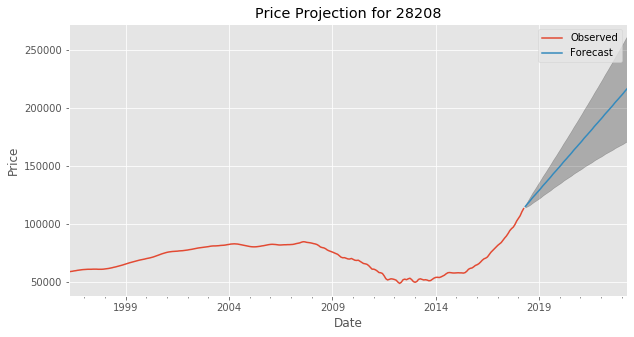

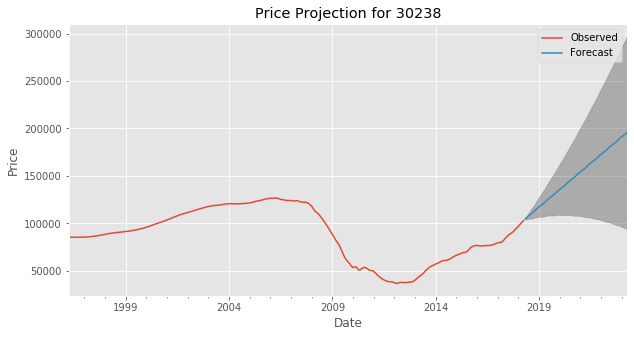

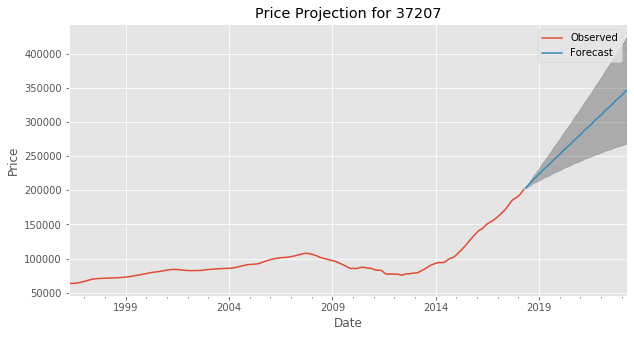

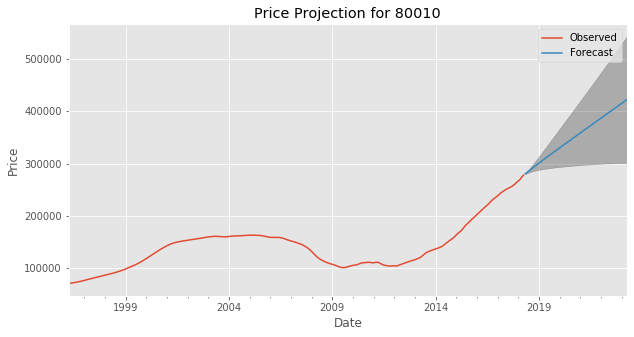

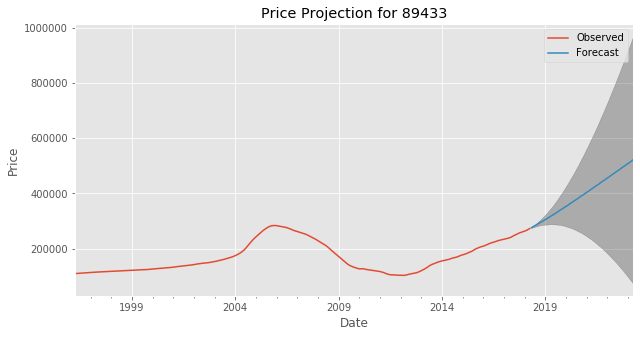

In [21]:
for c in recommendation.columns:
    col = recommendation[c].resample('MS').mean()
    col = col.fillna(col.bfill())
        
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
    for comb in pdq:
        for combs in pdqs:
            mod = sm.tsa.statespace.SARIMAX(col, order=comb, seasonal_order=combs, enforce_stationarity=False, enforce_invertibility=False)
            output = mod.fit()
            ans.append([comb, combs, output.aic])
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]
      
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(col,
                                order=ans_df.loc[ans_df['aic'].idxmin()][0],
                                seasonal_order=ans_df.loc[ans_df['aic'].idxmin()][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    output = ARIMA_MODEL.fit()

    prediction = output.get_forecast(steps = 60)
    pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals

    ax = col.plot(label='Observed', figsize=(10, 5))
    prediction.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title("Price Projection for " + str(col.name))

    plt.legend()
    plt.show()

These are the projected graphs of the top 5 zip codes, with confidence intervals.

## 7 Future Work

* Compare the projected price for 2019 with actual 2019 data
* Experiment with more expensive homes with price over 1 million
* Modify the risk threshold using different values of coefficient of variation
* Incoporate future economic outlook using external reports
* Use other time series algorithms such as VARMA or SES and compare the results
* Try other timeframes, such as 3 years or 10 years

## 8 Conclusion

These are the top 5 zip codes to invest in: 28208, 30238, 37207, 80010, and 89433. The investment firm should purchase homes in these areas.

In [22]:
result.iloc[[0,1,2,3,5]]

,Zip Code,Price in April 2018,Projected Price in April 2023,Percentage Increase,State,City,Metro
0,30238,102900.0,184913.202615,79.701849,GA,Jonesboro,Atlanta
1,28208,113400.0,201593.664970,77.772191,NC,Charlotte,Charlotte
2,37207,200800.0,346858.740690,72.738417,TN,Nashville,Nashville
3,89433,272600.0,452048.357727,65.828451,NV,Sun Valley,Reno
5,80010,277600.0,433940.347896,56.318569,CO,Aurora,Denver
